In [3]:
%matplotlib inline
%matplotlib notebook
from ipynb.fs.defs.utilities import *
from colorspacious import cspace_converter
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

# Computation of the bending angle achievable by a magnetic fetoscope with the Navion

This notebook compute the influence of the distance on the bending angle achievable with a magnetic fetoscope.

In [4]:
# Load system calibration
cal_path_navion = os.path.join('models/Navion_2_Calibration_24-02-2020.yaml')

model_navion = ForwardModelMPEM()
model_navion.setCalibrationFile(cal_path_navion)

In [5]:
def ComputeMaxFieldInPos(model_mns,position,Imin,Imax):
    
    J = model_mns.getFieldActuationMatrix(position)

    #Check feasibility at each grid point            
    N, d = HyperPlaneShiftingMethod(J,Imin,Imax)

    bmax = np.min(d)

    return bmax

def ComputeMaxField(Nx,Ny,Nz,pmin,pmax,Imin,Imax,model_mns,threshold_mT=-1):

    p_ws = np.empty((0,3))
    max_field_mT = np.array([])

    posx_v = np.linspace(pmin[0], pmax[0], Nx, endpoint=True)
    posy_v = np.linspace(pmin[1], pmax[1], Ny, endpoint=True)
    posz_v = np.linspace(pmin[2], pmax[2], Nz, endpoint=True) 

    for i in range(posx_v.shape[0]):
        for j in range(posy_v.shape[0]):
            for k in range(posz_v.shape[0]):
                
                                
                x = posx_v[i]
                y = posy_v[j]
                z = posz_v[k]

                position = np.array([posx_v[i],posy_v[j],posz_v[k]])
                bmax = ComputeMaxFieldInPos(model_mns,position,Imin,Imax)
                
                if bmax > threshold_mT/1000:
                    p_ws = np.append(p_ws, [position], axis=0)                
                    max_field_mT = np.append(max_field_mT, [bmax*1000], axis=0)
                
    return p_ws, max_field_mT

## Line in front of Navion

Compute achievable magnetic field along a line in front of Navion

In [8]:
#Horizontal plane
Nx = 1
Ny = 100 #100 points along line
Nz = 1

#Build initial box
pmin = np.array([0.,-0.20,0.])
pmax= np.array([0.,0.10,0.])

p, max_field = ComputeMaxField(Nx,Ny,Nz,pmin,pmax,-35,35,model_navion)

In [10]:
print(max_field)

[ 3.85489637  3.93235603  4.01173441  4.09308696  4.17647094  4.26194544
  4.34957149  4.43941206  4.53153221  4.62599908  4.72288203  4.82225266
  4.92418492  5.02875518  5.1360423   5.24612774  5.35909563  5.47503284
  5.59402913  5.71617716  5.84157269  5.97031456  6.10250491  6.23824919
  6.37765634  6.52083883  6.66791283  6.81899829  6.97421907  7.13370304
  7.29758224  7.46599294  7.63907581  7.816976    7.99984333  8.18783232
  8.38110238  8.57981792  8.78414842  8.99426862  9.21035856  9.43260373
  9.66119516  9.89632949 10.13820908 10.38704209 10.64304249 10.90643017
 11.17743092 11.45627645 11.74320438 12.0384582  12.34228718 12.65494628
 12.97669599 13.30780213 13.64853562 13.99917215 14.35999183 14.73127872
 15.11332029 15.50640682 15.91083061 16.32688514 16.75486406 17.19506002
 17.64776329 18.1132603  18.59183178 19.08375079 19.5892804  20.10867106
 20.64215762 21.18995592 21.75225897 22.32923256 22.92101037 23.52768835
 24.14931847 24.78590158 25.43737936 26.10362535 26

In [17]:
d = 0.2 - p[:,1] #distance in front of Navion
print(d)

[0.4        0.3969697  0.39393939 0.39090909 0.38787879 0.38484848
 0.38181818 0.37878788 0.37575758 0.37272727 0.36969697 0.36666667
 0.36363636 0.36060606 0.35757576 0.35454545 0.35151515 0.34848485
 0.34545455 0.34242424 0.33939394 0.33636364 0.33333333 0.33030303
 0.32727273 0.32424242 0.32121212 0.31818182 0.31515152 0.31212121
 0.30909091 0.30606061 0.3030303  0.3        0.2969697  0.29393939
 0.29090909 0.28787879 0.28484848 0.28181818 0.27878788 0.27575758
 0.27272727 0.26969697 0.26666667 0.26363636 0.26060606 0.25757576
 0.25454545 0.25151515 0.24848485 0.24545455 0.24242424 0.23939394
 0.23636364 0.23333333 0.23030303 0.22727273 0.22424242 0.22121212
 0.21818182 0.21515152 0.21212121 0.20909091 0.20606061 0.2030303
 0.2        0.1969697  0.19393939 0.19090909 0.18787879 0.18484848
 0.18181818 0.17878788 0.17575758 0.17272727 0.16969697 0.16666667
 0.16363636 0.16060606 0.15757576 0.15454545 0.15151515 0.14848485
 0.14545455 0.14242424 0.13939394 0.13636364 0.13333333 0.13030

<IPython.core.display.Javascript object>


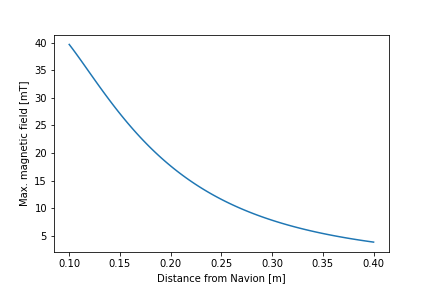

In [21]:
fig = plt.figure()

plt.plot(d,max_field)

plt.xlabel("Distance from Navion [m]")
plt.ylabel("Max. magnetic field [mT]")


plt.show()

### Estimate bending angle assuming constant curvature

Assuming constante curvature, the bending angle $\theta = A * b$ with $b$ the magnetic field magnitude

In [ ]:
A = 10
